# 논문에서의 simulation조건 확인

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.gen_Distribution import Lorentzian, Quantile_Lorentzian
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_perturbation as KP #Kuramoto_perturbation
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_without_aram as HY #Kuramoto_perturbation
from TO_sim.To_Draw import *
from TO_sim.Utility import *

In [23]:
N = 500
init_theta, init_omega, Kc = Quantile_Lorentzian(N)

In [157]:
N = 500
dist = 'Quantile Lorentzian'
t_end = 500
ss = 14
N = 500
dK = 0.1
dt = 0.1
ms = [6]
save = True
df_sets = {}
rdf_sets = {}
for m in ms:
    df,rdf = KP(m,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=dK, shuffle = True, shuffle_seed = ss)
    df_sets[m] = df
    rdf_sets[m] = rdf

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

In [158]:
DF=f'Review/22.11.17/With perturbation/{dist}/dK={dK}/with perturbation/'
Create_Folder(DF)

In [165]:
DF

'Review/22.11.17/With perturbation/Quantile Lorentzian/dK=0.1/with perturbation/'

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Check_theoretical.py:24: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


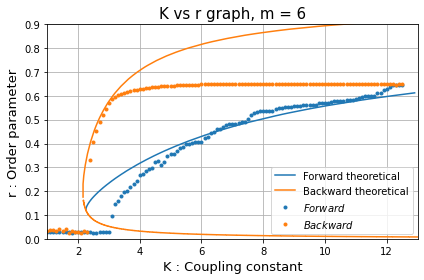

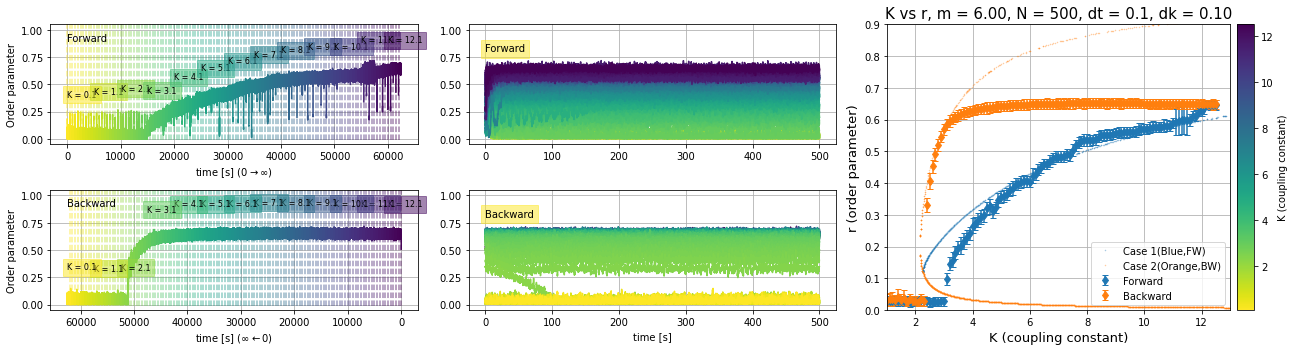

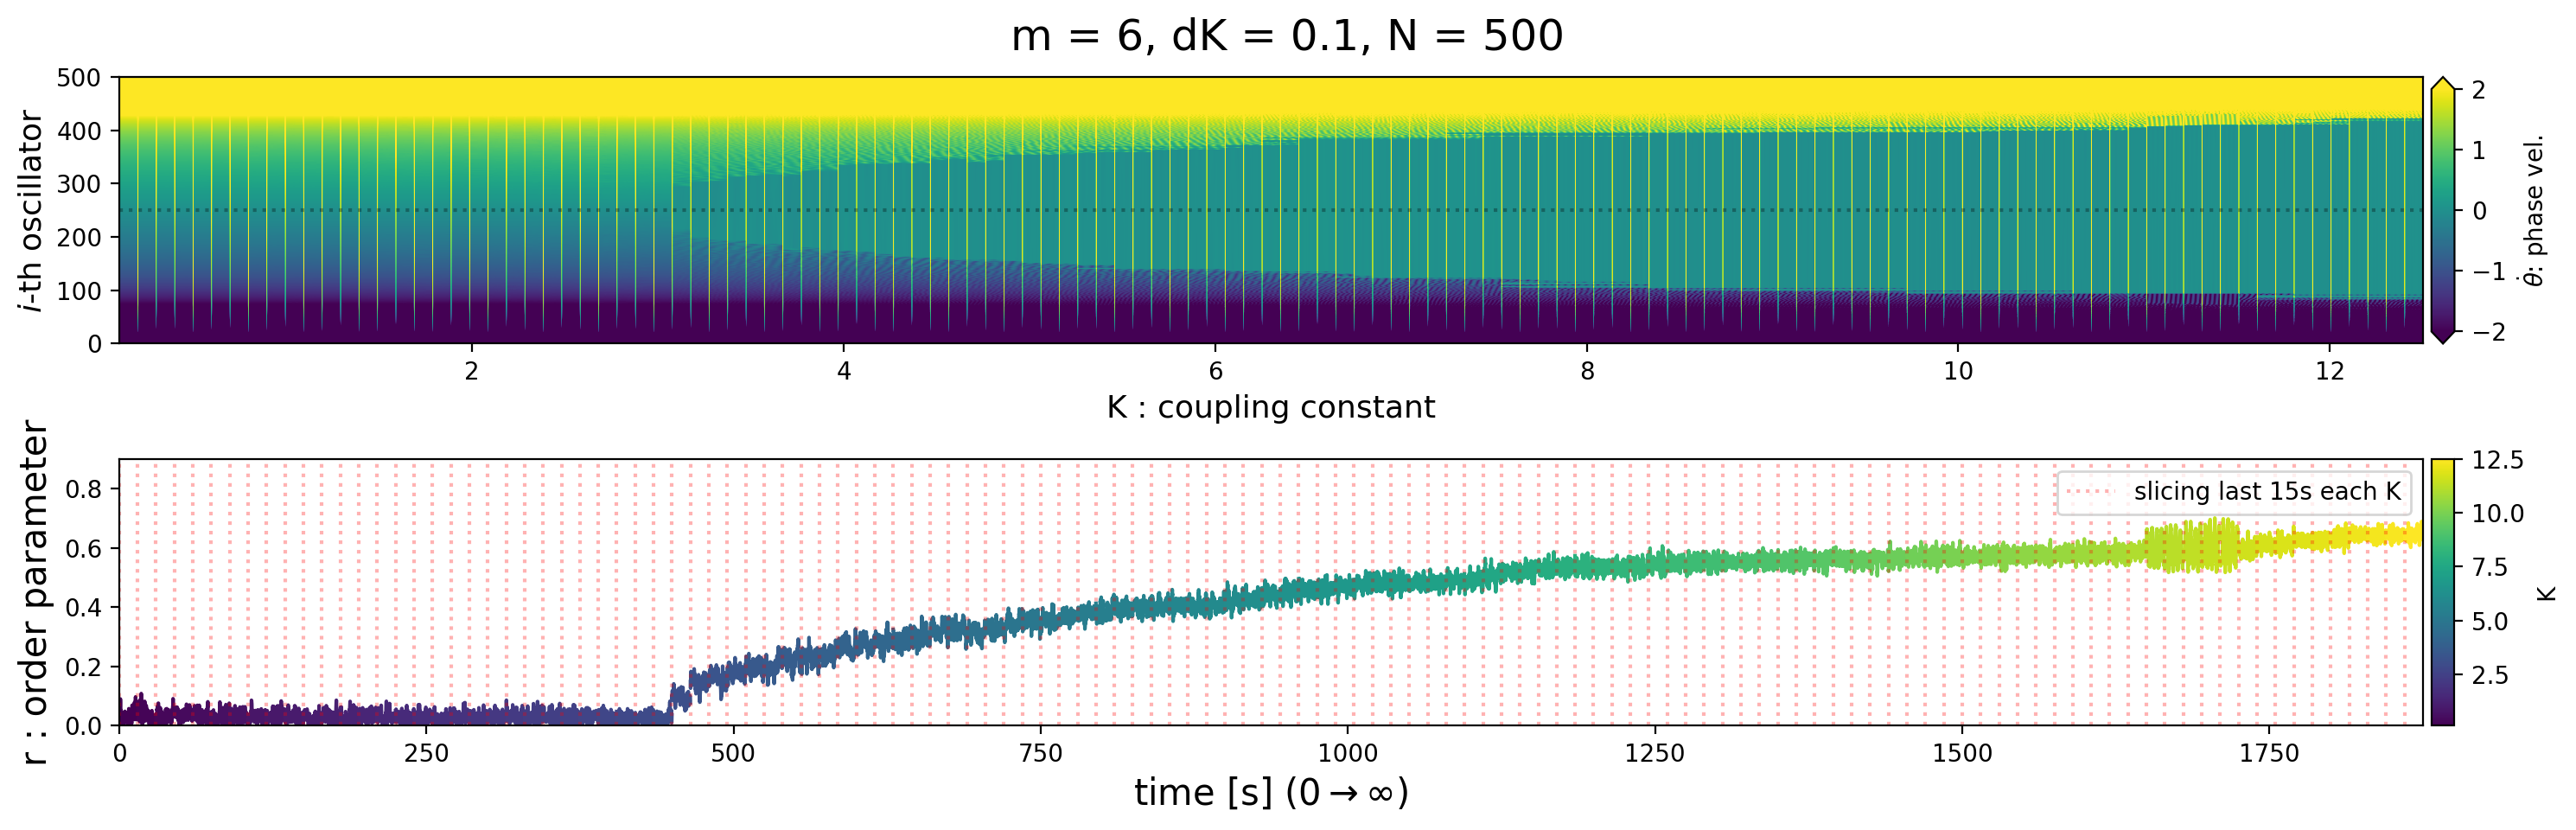

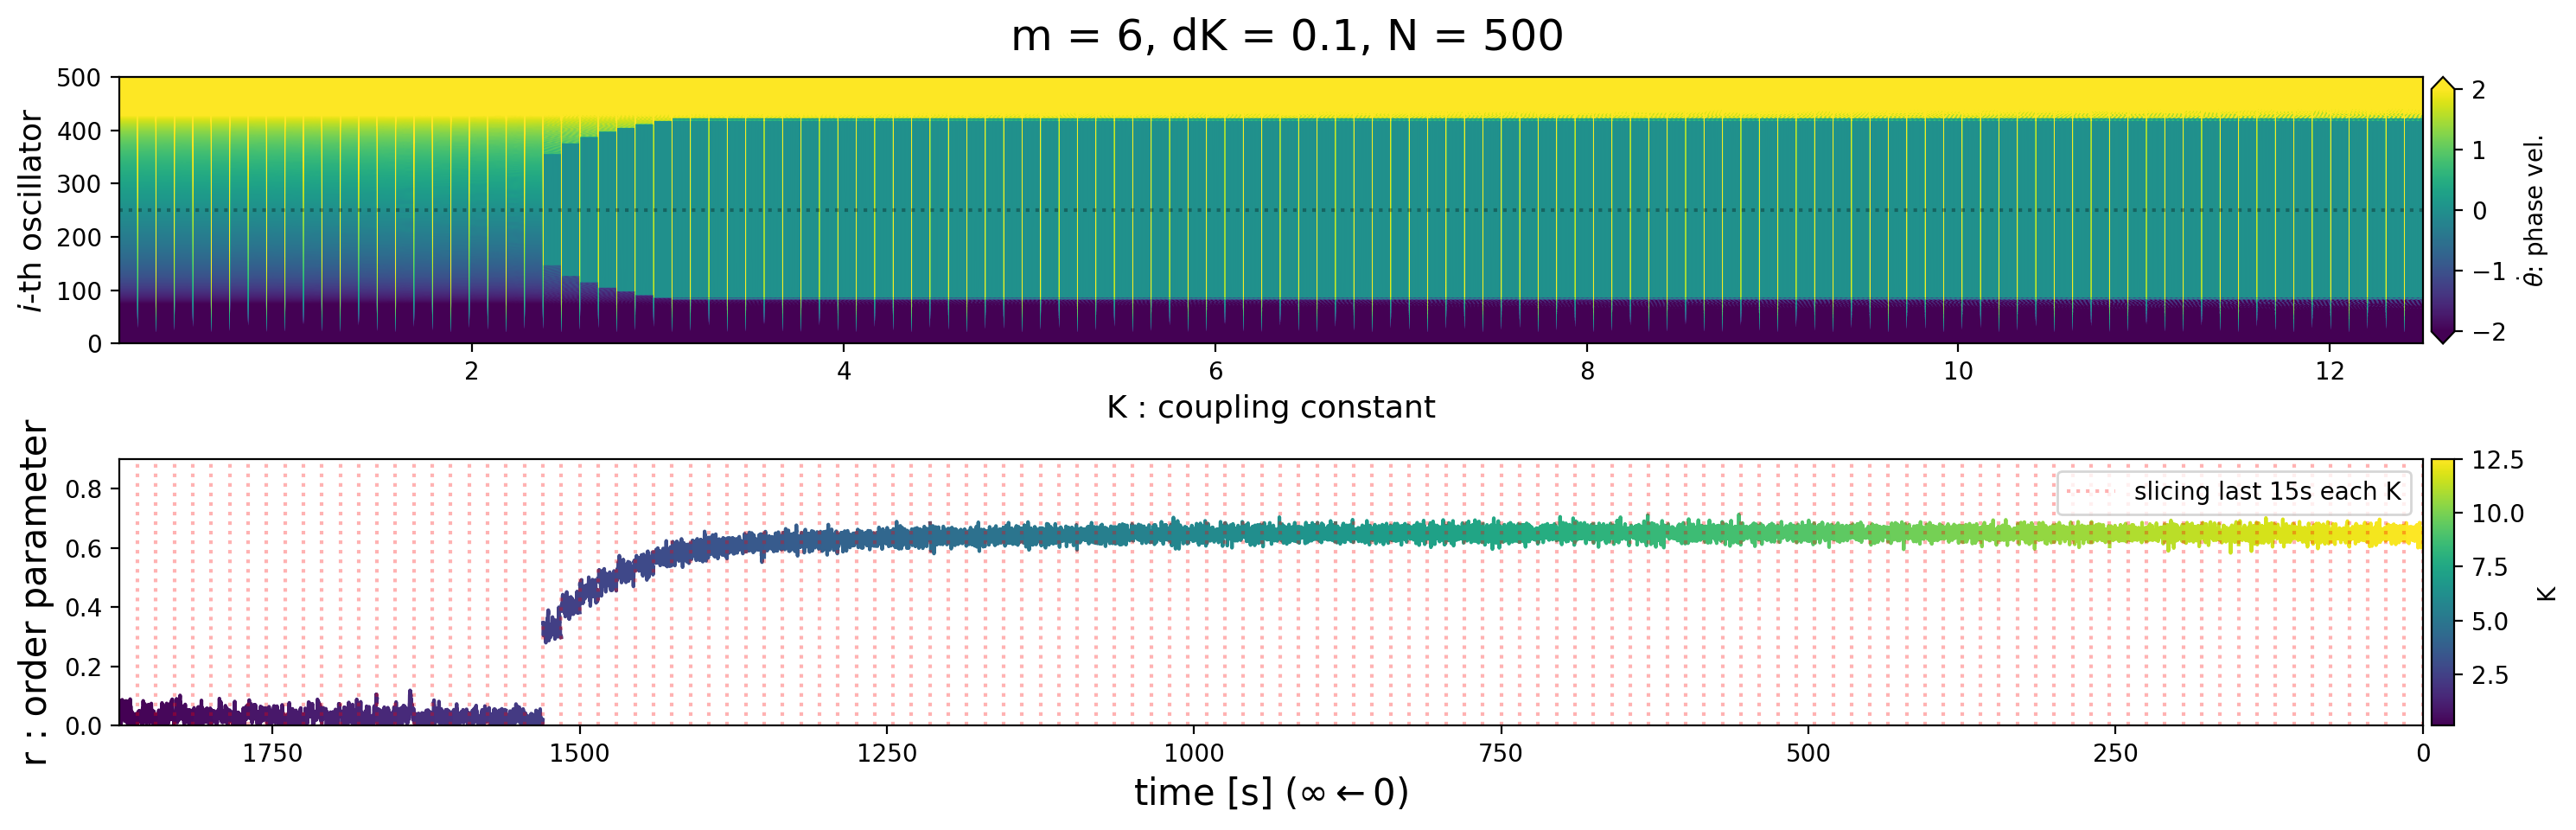

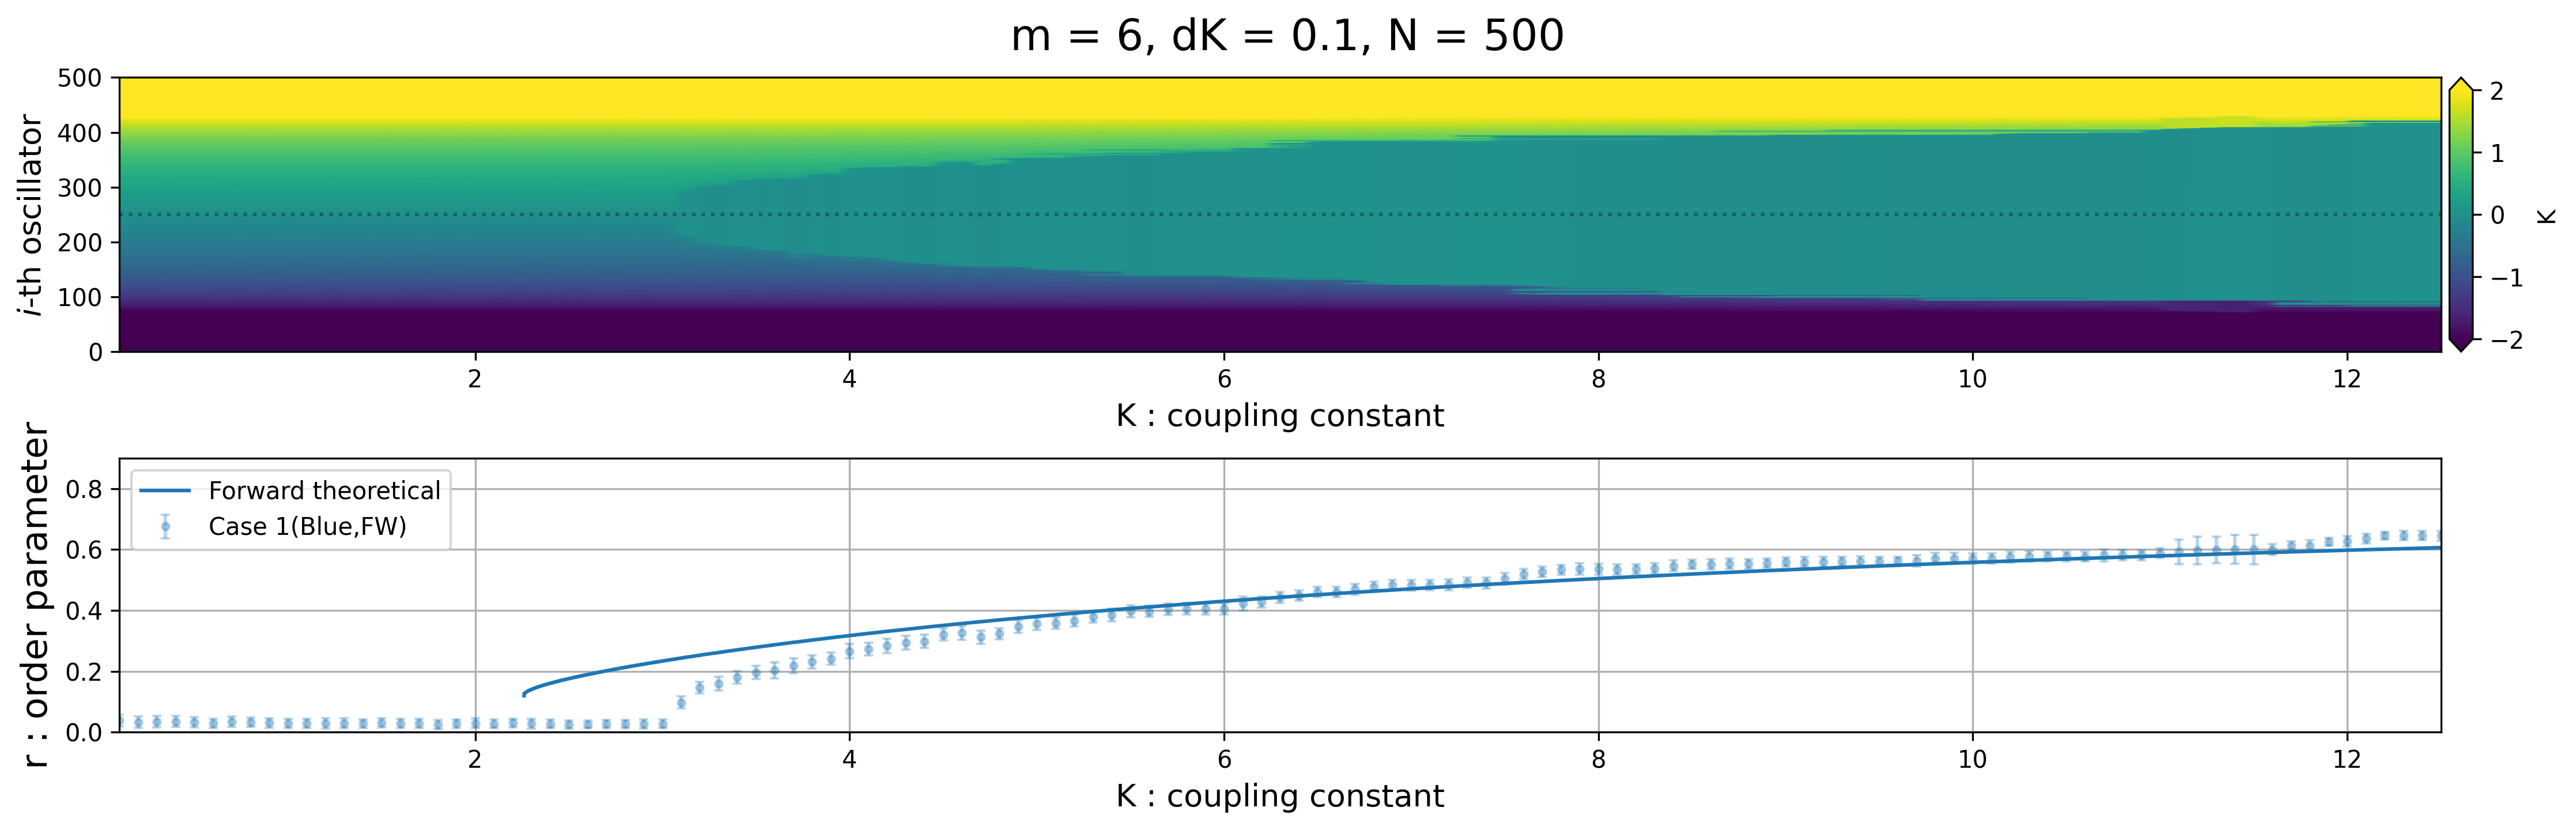

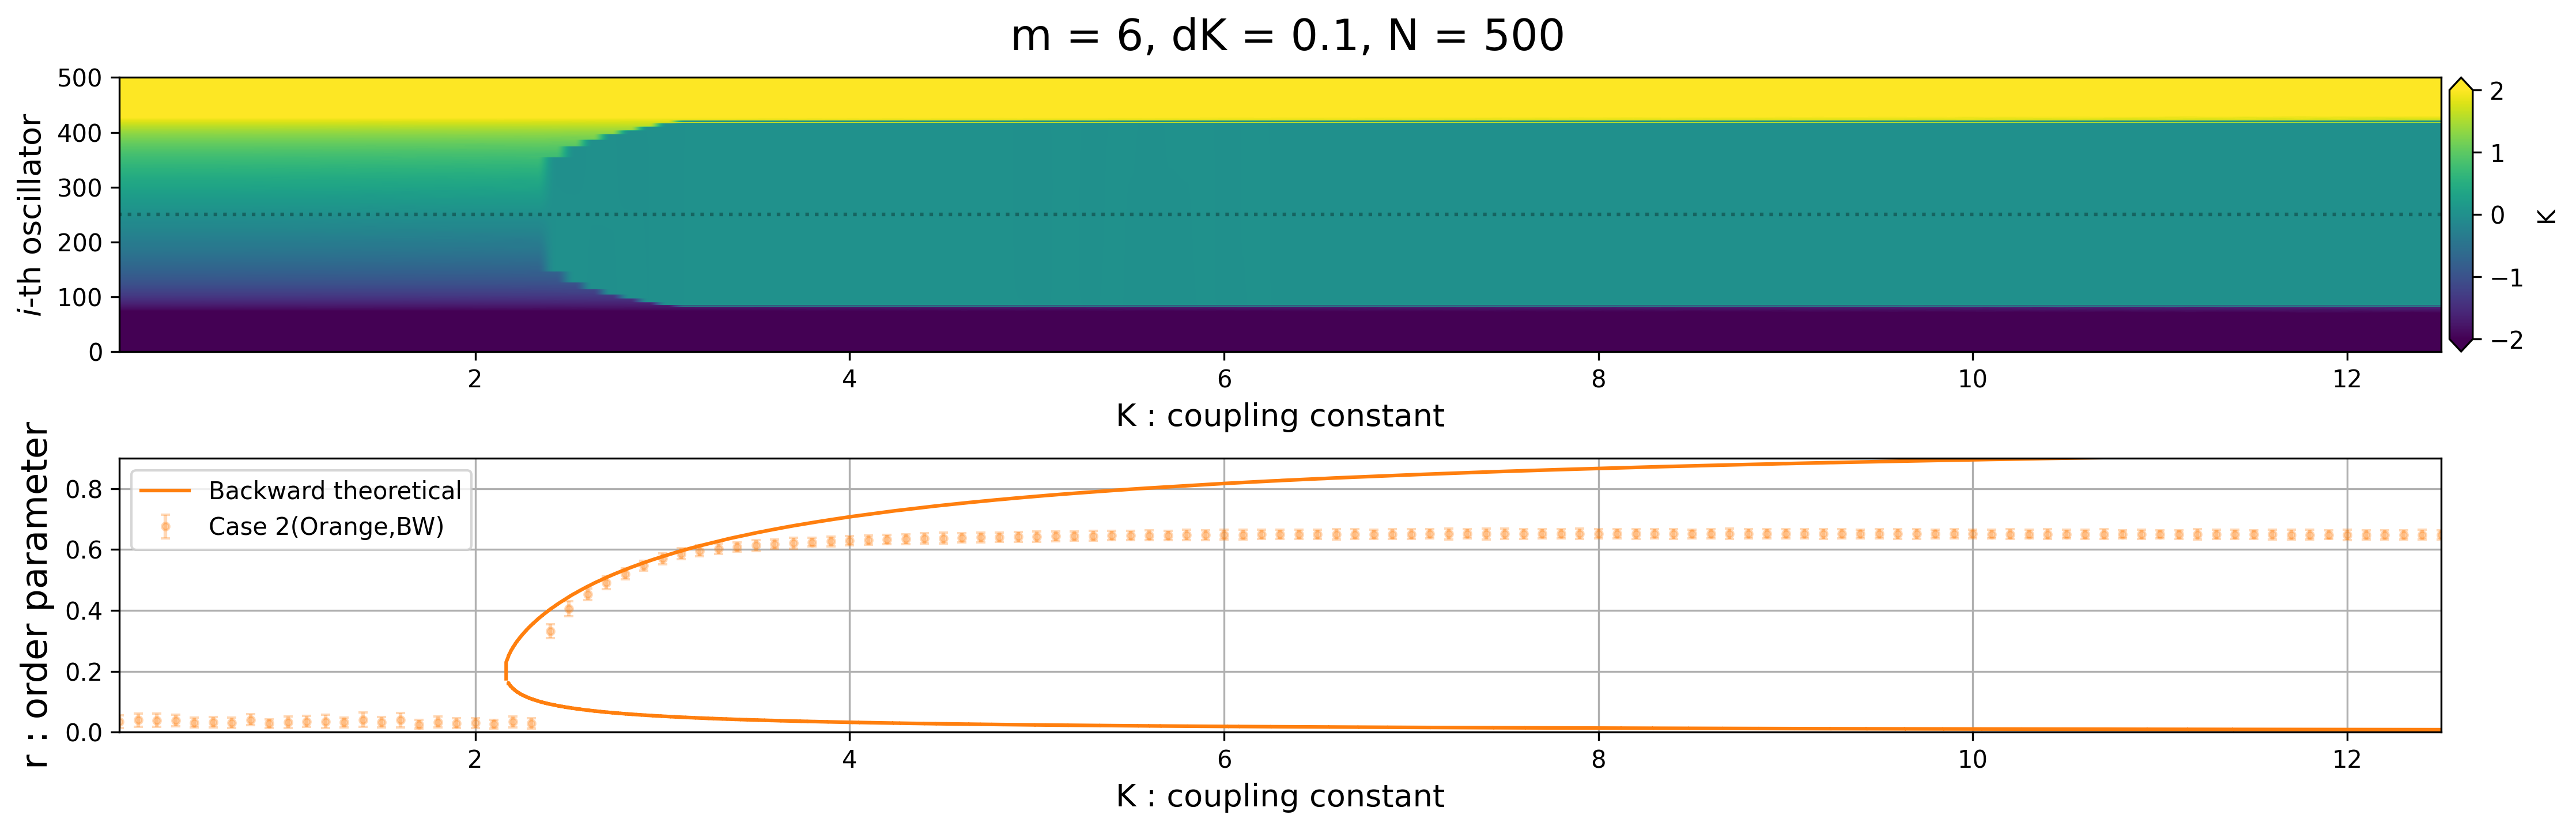

In [160]:
save = True
for m in ms:
    df = df_sets[m]
    rdf = rdf_sets[m]
    Draw_simple_Kr(df,rdf,m,Folder_name = DF,save=save)
    Time_R_df_total(df,rdf,N,m,Folder_name = DF,save=save)
    Draw_slicing_graph(df ,m,Folder_name = DF,save=save,reverse=False,dK=dK)
    Draw_slicing_graph(rdf,m,Folder_name = DF,save=save,reverse=True,dK=dK)
    Draw_mean_graph(df ,m,Folder_name = DF,save=save,reverse=False,dK=dK)
    Draw_mean_graph(rdf,m,Folder_name = DF,save=save,reverse=True,dK=dK)

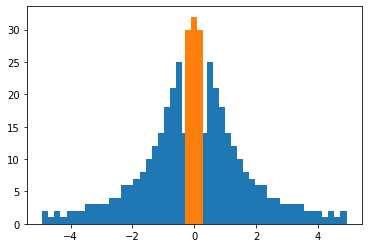

In [7]:
count,points,fig =plt.hist(np.where((abs(init_omega)>0.3)&(abs(init_omega)<5) ,init_omega,np.nan),bins=50)
count_in,points,fig =plt.hist(np.where((abs(init_omega)<0.3) ,init_omega,np.nan),bins=3)

In [7]:
df = df_sets[m]

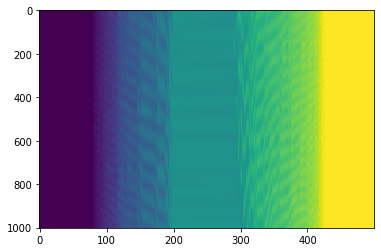

In [9]:
A = df.dtheta_s.iloc[17]
plt.imshow(A, aspect="auto",vmin = -2,vmax=2)

In [97]:
m = 0.95

In [ ]:
df = df_sets[m]
rdf = rdf_sets[m]
def Make_avg_theta(df,rdf,m):


ST = 50
Ks = df.index
Draw_ = Draw_theoretical(m)
data = np.array([(np.mean(df.dtheta_s.iloc[i][-ST*10:,:],axis=0)) for i in range(len(Ks))])
data_r = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_rs = [df.rs.iloc[i][-ST*10:] for i in range(len(Ks))]
data_max_rs = [np.max(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_min_rs = [np.min(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]


r_data = np.array([(np.mean(rdf.dtheta_s.iloc[i][-ST*10:,:],axis=0)) for i in range(len(Ks))][::-1])
r_data_r = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))][::-1]
r_data_rs = [rdf.rs.iloc[i][-ST*10:] for i in range(len(Ks))][::-1]
r_data_max_rs = [np.max(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))][::-1]
r_data_min_rs = [np.min(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))][::-1]
r_data_std = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))][::-1]
i = 0
K = Ks[i]
fig,ax = plt.subplots(1)
ax.plot(data[i],label = f'Forward')
# ax.plot(r_data[i],label = f'Backward')
ax.set_xlabel('i-th oscillator',fontsize=13)
ax.set_ylabel(r'$\left\langle\dot{\theta}\right\rangle$'+': average phase vel.',fontsize=13)
ax.grid()
ax.set_ylim(-3,3)
ax.legend()
ax.set_title(f'N = {N}, m= {m}, K = {K}',fontsize=15)
ax11 = plt.gca()
divider11 = make_axes_locatable(ax11)
cax11 = divider11.append_axes("right", size="10%", pad=0.10)
ax2 = plt.gca()
ax2t = ax2.twinx()
ax2t.violinplot(data_rs[i],[0])
# ax2t.violinplot(r_data_rs[i],[0])
ax2t.plot(0,data_r[i],marker='d',color = 'tab:blue')
# ax2t.plot(0,r_data_r[i],marker='d',color = 'tab:orange')
ax2.set_xticks([])
ax2.set_yticks([])
ax2t.set_ylabel('r: order parameter',fontsize=13)
# plt.yticks('right')
ax2t.set_ylim(0,0.9)


In [161]:
df = df_sets[m]
rdf = rdf_sets[m]
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
def Make_avg_theta(df,m):
    ST = 50
    Ks = df.index
    Draw_ = Draw_theoretical(m)
    data = np.array([(np.mean(df.dtheta_s.iloc[i][-ST*10:,:],axis=0)) for i in range(len(Ks))])
    data_r = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rs = [df.rs.iloc[i][-ST*10:] for i in range(len(Ks))]
    data_max_rs = [np.max(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_min_rs = [np.min(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]

    i = 0
    K = Ks[i]
    fig,ax = plt.subplots(1)
    ax.plot(data[i],label = f'Forward')
    # ax.plot(r_data[i],label = f'Backward')
    ax.set_xlabel('i-th oscillator',fontsize=13)
    ax.set_ylabel(r'$\left\langle\dot{\theta}\right\rangle$'+': average phase vel.',fontsize=13)
    ax.grid()
    ax.set_ylim(-3,3)
    ax.legend()
    ax.set_title(f'N = {N}, m= {m}, K = {K}',fontsize=15)
    ax11 = plt.gca()
    divider11 = make_axes_locatable(ax11)
    cax11 = divider11.append_axes("right", size="10%", pad=0.10)
    ax2 = plt.gca()
    ax2t = ax2.twinx()
    ax2t.violinplot(data_rs[i],[0])
    # ax2t.violinplot(r_data_rs[i],[0])
    ax2t.plot(0,data_r[i],marker='d',color = 'tab:blue')
    # ax2t.plot(0,r_data_r[i],marker='d',color = 'tab:orange')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2t.set_ylabel('r: order parameter',fontsize=13)
    # plt.yticks('right')
    ax2t.set_ylim(0,0.9)
    def Animation(num):
        i = num
        K = Ks[i]
        ax.clear()
        ax2t.clear()
        ax.plot(data[i],label = f'K = {K}')
        # ax.plot(r_data[i],label = f'Backward')

        ax.set_xlabel('i-th oscillator',fontsize=13)
        ax.set_ylabel(r'$\left\langle\dot{\theta}\right\rangle$'+': average phase vel.',fontsize=13)
        ax.grid()
        ax.set_ylim(-3,3)
        ax.legend()
        ax.set_title(f'N = {N}, m= {m}, K = {K}',fontsize=15)
        ax2t.violinplot(data_rs[i],[0])
        # ax2t.violinplot(r_data_rs[i],[0])

        ax2t.plot(0,data_r[i],marker='d',color = 'tab:blue')
        # ax2t.plot(0,r_data_r[i],marker='d',color = 'tab:orange')

        ax2.set_xticks([])
        ax2.set_yticks([])
        ax2t.set_ylabel('r: order parameter',fontsize=13)
        # plt.yticks('right')
        ax2t.set_ylim(0,0.9)
    ani = FuncAnimation(fig,Animation,frames=np.arange(0,len(Ks)),interval=500)
    return ani

In [162]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

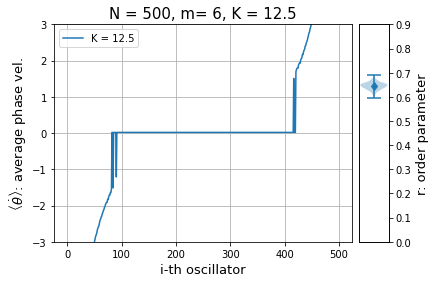

In [163]:
# ani = FuncAnimation(fig,Animation,frames=np.arange(0,len(Ks)),interval=500)
for m in ms:
    df = df_sets[m]
    ani = Make_avg_theta(df,m)
    HTML(ani.to_jshtml())
    ani.save(DF+f"N={N}, m={m}, K vs avg phase vel forward.mp4",dpi=400)

In [166]:
DF

'Review/22.11.17/With perturbation/Quantile Lorentzian/dK=0.1/with perturbation/'

In [164]:
HTML(ani.to_jshtml())

In [104]:
np.sqrt(1-2/12.5)

0.916515138991168

In [ ]:
for i,K in enumerate(Ks):
    plt.figure()
    plt.plot(data[i],label = f'K = {K}')
    plt.grid()
    plt.ylim(-3,3)
    plt.legend()
    
    ax11 = plt.gca()
    divider11 = make_axes_locatable(ax11)
    cax11 = divider11.append_axes("right", size="10%", pad=0.10)
    ax2 = plt.gca()
    ax2t = ax2.twinx()
    ax2t.violinplot(data_rs[i],[0])
    ax2t.plot(0,data_r[i],marker='d',color = 'tab:blue')
    ax2.set_xticks([])
    ax2.set_yticks([])
    # plt.yticks('right')
    plt.ylim(0,0.9)
    cax11.set_label(r'$\dot{\theta}$: phase vel.')

(-2.0, 2.0)

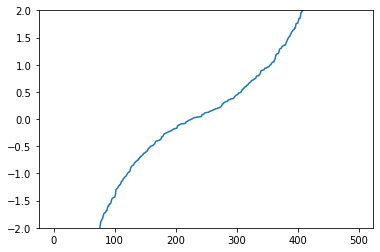

In [11]:
plt.plot(data[0])
plt.ylim(-2,2)


In [3]:
dist = 'normal'

In [5]:
"Normal".upper

<function str.upper()>

In [6]:
if dist.upper() == "Normal".upper():
    print('ja')

ja
